## Final Project Submission

Please fill out:
* Student name: Matthew Parker
* Student pace: full time
* Scheduled project review date/time: ????
* Instructor name: Rafael Carrasco
* Blog post URL: ????


# Importing and Inspecting

In [1]:
#let's just go ahead and import every python library in existence....just in case  :-)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
plt.style.use('seaborn')

In [112]:
#reading the .csv file into a pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [113]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It appears that two of our columns have values stored as strings. Also, three columns are missing some data.

# Cleaning the data

Check all columns for placeholders, duplicates, or other atypical values.

In [115]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

According to the reports above, we have several odd things going on:
1. There is a duplicate row in the "id" column at "795000620"
2. Over half of the "sqft_basement" column is "0.0"; additionally, 21% of all values are "?" placeholders; furthermore, the column's datatype is string instead of numeric
3. The "waterfront" column is over 99% "0.0"; this column is also missing 2,376 values (~11% of total)
4. The vast majority (90%) of values in the "view" column are "0.0"; this is in addition to 63 missing values
5. The "yr_renovated" column is 95.8% "0.0"; this column is also missing 3,842 values (~17.8% of total)

Let's deal with these one at a time, beginning with the duplicate instance of "795000620". Let's display both instances to make sure that they contain the same data.

### Dealing with duplicates

In [116]:
df.loc[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


So it turns out that this house was sold several times over the span of a few months. This is fine, but notice that some of the columns have missing values (like 'waterfront' and 'yr_renovated'). We should probably check to make sure that the rest of the dataset doesn't have any instances of duplicates where missing values can be filled in.

In [117]:
# since we're about to slice out scattered rows, we should create a 
# new column that duplicates the original index. This will make
# merging the sliced data back in much easier later on.
df = df.reset_index()

In [118]:
duplicates = df[df.duplicated(subset='id', keep=False)]

# How many duplicates do we have?
print(len(duplicates))

353


In [119]:
# let's see if there are any houses which *only* have NaN values for 'waterfront'
duplicates.loc[duplicates['waterfront']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
824,824,726049190,2/18/2015,431000.0,3,1.00,1810,7200,1.0,NaN,...,7,1130,680.0,1954,0.0,98133,47.7493,-122.351,1810,8100
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
10261,10261,1450100390,9/5/2014,125000.0,3,1.00,920,7314,1.0,NaN,...,6,920,0.0,1960,0.0,98002,47.2892,-122.220,1010,7420
4868,4868,1524079093,3/18/2015,369500.0,3,1.75,1300,20700,1.0,NaN,...,7,1300,0.0,1962,0.0,98024,47.5587,-121.904,1930,37638
5718,5718,1788800630,10/29/2014,96500.0,3,1.00,840,12091,1.0,NaN,...,6,840,0.0,1959,0.0,98023,47.3281,-122.343,840,9324
3536,3536,1823049202,6/10/2014,175000.0,6,1.50,1930,8400,1.0,NaN,...,7,1030,900.0,1971,0.0,98146,47.4869,-122.340,1780,9520
3947,3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
19195,19195,1901600090,4/26/2015,390000.0,5,1.75,1940,6654,1.5,NaN,...,7,1940,0.0,1953,0.0,98166,47.4663,-122.359,2300,9500
1862,1862,2143700830,10/6/2014,207000.0,4,2.50,2100,19680,1.5,NaN,...,6,2100,0.0,1914,0.0,98055,47.4787,-122.230,1340,12300


In [120]:
# let's see if there are any houses which *only* have NaN values for 'yr_renovated'
duplicates.loc[duplicates['yr_renovated']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16801,16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
12406,12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
14841,14841,324000530,7/8/2014,201500.0,3,1.00,1320,5000,1.5,0.0,...,7,1320,0.0,1912,NaN,98116,47.5711,-122.386,1320,4179
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
12422,12422,1217000340,6/6/2014,185000.0,3,1.00,1840,8100,1.0,0.0,...,7,920,920.0,1953,NaN,98166,47.4550,-122.350,1250,8100
8497,8497,1237500540,12/22/2014,270000.0,3,1.75,1370,10866,1.0,0.0,...,6,1370,0.0,1945,NaN,98052,47.6774,-122.164,1580,14250
3752,3752,1254200015,12/16/2014,405000.0,3,2.50,2260,5500,1.5,0.0,...,7,1280,980.0,1910,NaN,98117,47.6810,-122.388,1790,5355
14560,14560,1432400120,11/11/2014,165000.0,3,1.00,1010,7690,1.0,0.0,...,6,1010,0.0,1958,NaN,98058,47.4501,-122.176,1010,7619
10262,10262,1450100390,3/16/2015,208000.0,3,1.00,920,7314,1.0,0.0,...,6,920,0.0,1960,NaN,98002,47.2892,-122.220,1010,7420
4867,4867,1524079093,8/27/2014,275000.0,3,1.75,1300,20700,1.0,0.0,...,7,1300,0.0,1962,NaN,98024,47.5587,-121.904,1930,37638


So looking at the duplicated data, it seems that we would be safe to convert all 'waterfront' NaN values to '0.0', except for *id*'s '2212200100', '5054800110', and '5249801440' (which only have NaN values in both instances). The same is true for all 'yr_renovated' NaN values except for *id*'s '1922059278', '1954420170', '3262300940', '4222310010', and '7972000010'.

So, first we will remove the seven pairs of rows just mentioned since we cannot reliably fill in any missing data. Then, let's replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'. Finally, we will merge the *duplicates* DataFrame back into the original *df* DataFrame so that our changes are updated to the original.

In [121]:
# change index to 'id' so that we can tell pandas which rows to remove
duplicates = duplicates.set_index('id')
duplicates.drop([2212200100, 5054800110, 5249801440, 1922059278, 1954420170, 
                 3262300940, 4222310010, 7972000010], inplace=True)

# now reset the index to preserve the 'id' column, then set the index back
# to 'index' for merging with the original DataFrame
duplicates = duplicates.reset_index()
duplicates = duplicates.set_index('index')

In [122]:
# now replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'
duplicates.waterfront.fillna(0, inplace=True)
duplicates.yr_renovated.fillna(0, inplace=True)

In [123]:
# Now let's merge the duplicates DataFrame back into the original.
# first set df's index back to 'index' as it originally was.
df.set_index('index', inplace=True)
df.update(duplicates, overwrite=True)

# because pandas converts all integers to floats in an update, we need to set them back
df = df.astype({'id': 'int64', 'bedrooms': 'int64', 'sqft_living': 'int64', 'sqft_lot': 'int64', 
                  'condition': 'int64', 'grade': 'int64', 'sqft_above': 'int64', 'yr_built': 'int64', 
                  'zipcode': 'int64', 'sqft_living15': 'int64', 'sqft_lot15': 'int64'})

Alright, that's 1 down, only 4 more weird features to go. 

### Changing datatypes 

Convert the values in the *date* column to the *datetime* datatype.

In [124]:
df.date = pd.to_datetime(df.date)

Let's tackle the problematic "sqft_basement" column next. First, we'll turn all the "?" values into NaN values. Then we'll convert the entire column into numeric data using the *.to_numeric* method.

In [125]:
# we define a function that will replace all "?" values with NaN
def impute_sqft_basement(value):
    if value == '?':
        return None
    else:
        return value

# now we map a lamba function to iterate the above "impute" function through
# the *sqft_basement* column
df.sqft_basement = df.sqft_basement.map(lambda x: impute_sqft_basement(x))

In [126]:
# and now we will change the data type to numeric
df.sqft_basement = pd.to_numeric(df.sqft_basement)

Okay, that's another weird column dealt with. 

### Missing values

How about the *waterfront* and *yr_renovated* columns? Since both column are missing over 10% of their data *and* around 95-99% of the known values are identical, it should be safe to exclude these variables from our model. The values for the variable *view* are also 90% identical, so let's drop it as well.

In [127]:
# create a new dataframe labeled as a subset of the original, then use the *.drop* method
df_subset = df.drop(['waterfront', 'yr_renovated', 'view'], axis=1)

OK, now we just have left the missing values in *sqft_basement* to contend with. About 60% of the properties have no basement and there are 454 NaN values. Intuitively, it seems like the presence/absence of a basement is likely to impact the sale price of a home, so instead of dropping the column let's just drop the rows with NaN values instead. This is only 2% of our dataset, so our model should not be significantly effected.

Furthermore, since any values for *sqft_basement* should just be the difference between *sqft_living* and *sqft_above* (or close to it), the actual values in this column are not as important. Since over half of the houses don't have a basement anyway, let's turn this column into a categorical one that just tells us whether or not a house has a basement at all.

In [128]:
# getting rid of NaN values
df_subset.dropna(subset=['sqft_basement'], inplace=True)

# changing all positive values to "1"
# we can just reuse and slightly change our 'impute' function from above
def impute_sqft_basement_again(value):
    if value > 0:
        return 1
    else:
        return value


df_subset.sqft_basement = df_subset.sqft_basement.map(lambda x: impute_sqft_basement_again(x))

# rename the column to make it more informative
# and also make it an integer instead of a float
df_subset.rename(columns={'sqft_basement':'basement'}, inplace=True)
df_subset = df_subset.astype({'basement': 'int64'})

Let's go ahead and drop *zipcode* from our *df_subset* DataFrame since it is an arbitrary value denoting location that can also be handled by the *lat* and *long* categories. Also, let's drop *id* and *date* as well since they are not really variables, but rather identifiers (also, we have not covered timeseries interpretation yet).

In [129]:
df_subset.drop(['zipcode', 'id', 'date'], axis=1, inplace=True)

## Variable Correlation


Now that our data has been sufficiently cleaned, let's get a look at our variables and whether they might be related.

*Warning*: this will take a while to compute due to the size of the data set.


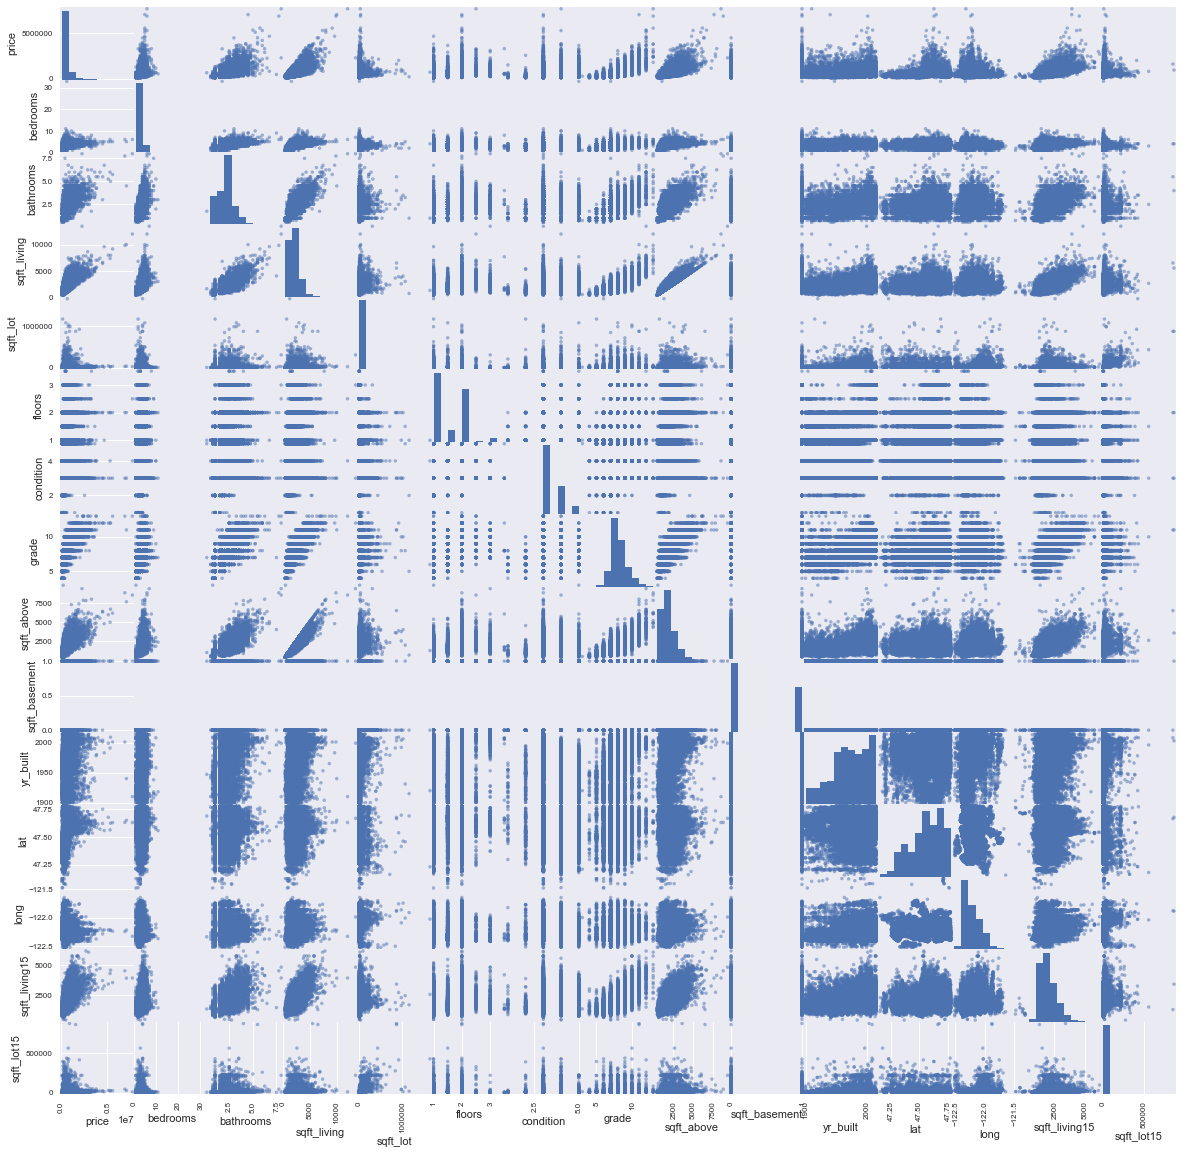

In [89]:
# let's use a scatter matrix to take a quick look at the variables
# end code line with a semicolon so that only the graph is displayed
pd.plotting.scatter_matrix(df_subset, figsize=(20,20));

Wow, that's a lot of tiny graphs! But we can immediately discern a few important characteristics:
1. We seem to have several variables with categorical data: *floors*, *condition*, and *grade* for sure. Logically, *bathrooms* and *bedrooms* would also be categorical, but it seems we may have an outlier in *bedrooms* and *floors*.
2. Looking at the relations with the *price* variable, we have several candidates for linear relationships: *bedrooms*, *bathrooms*, *sqft_living*, *sqft_above*, and *sqft_living15*
3. Heavily left-skewed distribution: *price*, *bedrooms*, *sqft_living*, *sqft_above*, *sqft_living15*, *long*
4. somewhat normally distributed: *bathrooms*, *grade*
5. *zipcode* shows a rather random distribution, so we can probably safely drop it

Let's check out what's going on with *bedrooms* and *floors*.

In [130]:
# now let's check out our potential categorical variables more closely
cats = ['floors','condition', 'grade', 'bathrooms', 'bedrooms']
for cat in cats:
    print(df_subset[cat].value_counts(normalize=False))

1.0    10456
2.0     8066
1.5     1865
3.0      593
2.5      156
3.5        7
Name: floors, dtype: int64
3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64
7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64
2.50    5255
1.00    3757
1.75    2991
2.25    2014
2.00    1886
1.50    1422
2.75    1160
3.00     736
3.50     719
3.25     574
3.75     152
4.00     135
4.50      96
4.25      79
0.75      71
4.75      23
5.00      19
5.25      13
1.25       9
5.50       9
6.00       6
5.75       4
0.50       3
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
3     9639
4     6740
2     2691
5     1560
6      262
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


#### Outliers

Wow, so it seems like most of these categories have some extreme outliers. We can probably drop any category that appears less than around 20 times.

In [131]:
# dropping grade outliers
indexNames = df_subset[df_subset['grade'] == 13 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['grade'] == 3 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bedroom outliers
indexNames = df_subset[df_subset['bedrooms'] >= 8 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bathroom outliers
# we will group fractions of bathrooms together later
indexNames = df_subset[df_subset['bathrooms'] >= 6 ].index
df_subset.drop(indexNames , inplace=True)

# dropping floor outliers
indexNames = df_subset[df_subset['floors'] == 3.5 ].index
df_subset.drop(indexNames , inplace=True)

#### Dropping *price* outliers

We should also get rid of the crazy-expensive houses. Let's try keeping everything within 7 standard deviations of the mean (so as not to eliminate *too* much data.

In [132]:
print('mean = ', df_subset.price.mean())
print('std = ', df_subset.price.std())
up_lim = (df_subset.price.mean() + (7*df_subset.price.std()))
print('upper limit of our concern = ', up_lim)

mean =  536944.4618266312
std =  351023.0207416306
upper limit of our concern =  2994105.6070180456


In [133]:
# dropping price outliers based on 
indexNames = df_subset[df_subset['price'] > up_lim].index
df_subset.drop(indexNames , inplace=True)

Now that we've seen that several of the variables display relationships, and that several independent variables might be related, let's use a correlation heatmap to filter out which ones are related the closest.

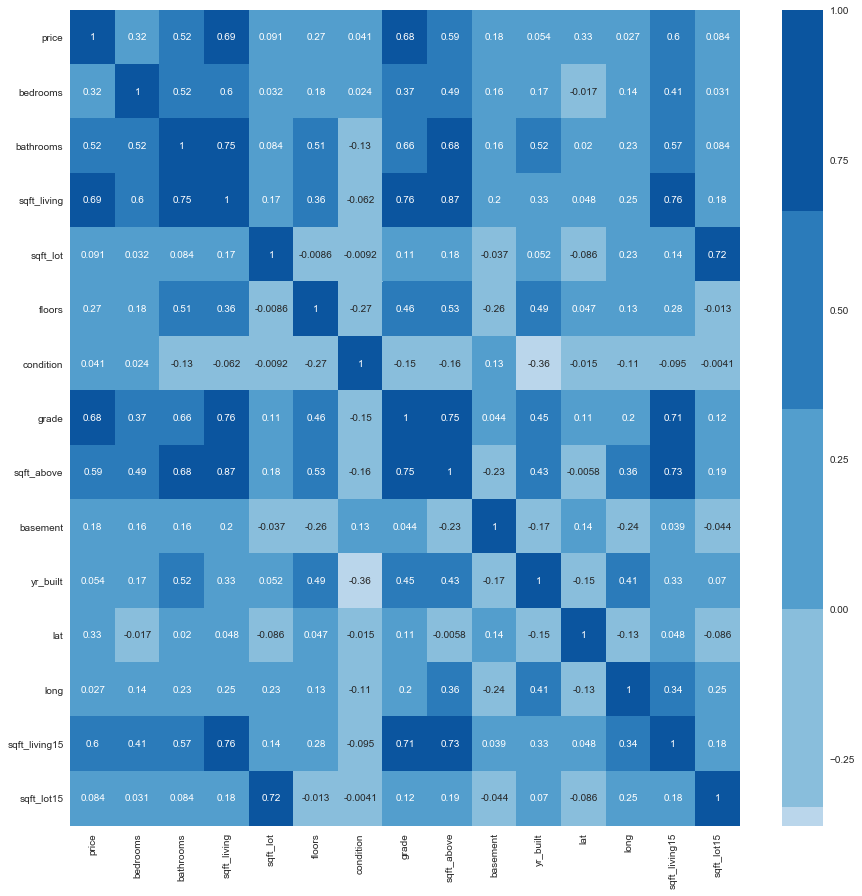

In [134]:
plt.figure(figsize=(15,15))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

It appears that *sqft_lot*, *condition*, *yr_built*, and *sqft_lot15* are each correlated to price by less than 10%, so let's go ahead and drop those.  We'll keep *long* for now since it is likely related to *lat* in some way.

In [135]:
df_subset.drop(['sqft_lot', 'condition', 'yr_built', 'sqft_lot15'], axis=1, inplace=True)

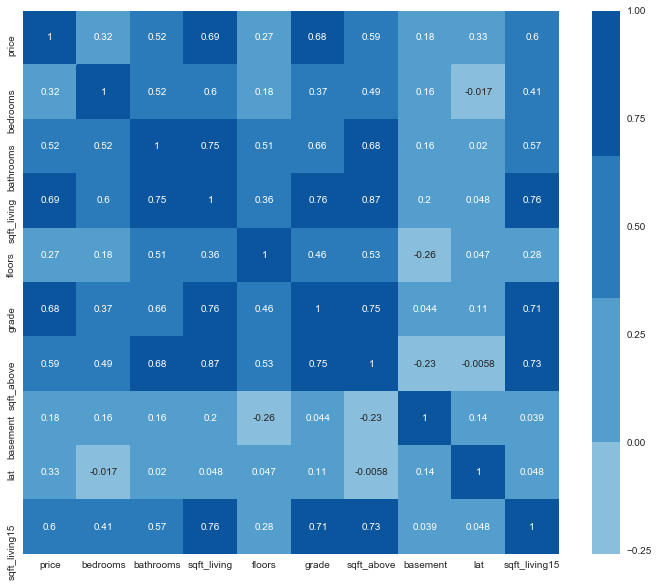

In [136]:
# cleaned up heatmap again
plt.figure(figsize=(12,10))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

We also seem to have numerous candidates for multicolinearity. Rather than addressing them all right now, let's see if we can pare down our list of variables first. Use *statsmodels* to see which variables have the highest *p-values*.

In [137]:
# split the dependent variable 'price' from the rest of the data
y = df_subset['price']
x = df_subset.drop(['price'], axis=1)

# now establish a constant for our model
X = sm.add_constant(x)

# now run an Ordinary Least Squares model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3784.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        16:29:12   Log-Likelihood:            -2.8691e+05
No. Observations:               21050   AIC:                         5.738e+05
Df Residuals:                   21040   BIC:                         5.739e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.036e+07   4.86e+05    -62.531      0.000   -3.13e+07   -2.94e+07
bedrooms      -2.765e+04   2027.479    -13.640      0.000   -3.16e+04   -2.37e+04
bathrooms     -1.099e+04   3146.637     -3.492      0.000   -1.72e+04   -4820.434
sqft_living     181.3356      6.326     28.666      0.000     168.936     193.735
floors        -1.202e+04   3517.505     -3.418      0.001   -1.89e+04   -5129.514
grade          8.763e+04   2127.131     41.198      0.000    8.35e+04    9.18e+04
sqft_above      -25.8884      6.900     -3.752      0.000     -39.412     -12.365
basement       1.683e+04   5340.158      3.152      0.002    6362.605    2.73e+04
lat            6.295e+05   1.02e+04     61.468      0.000    6.09e+05     6.5e+05
sqft_living15    43.7273      3.393     12.886      0.000      37.076      50.379
==============================================================================
Omnibus:                    11385.931   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143735.083
Skew:                           2.333   Prob(JB):                         0.00
Kurtosis:                      14.921   Cond. No.                     1.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this initial summary we can see that pretty much all of the variables have good *p-value* scores.

Also, our *skew* and *kurtosis* scores are pretty awful, but we'll tackle them later.

Now that we've whittled down our variables a bit, let's take another look at their scatter plots using a *scatter_matrix*.

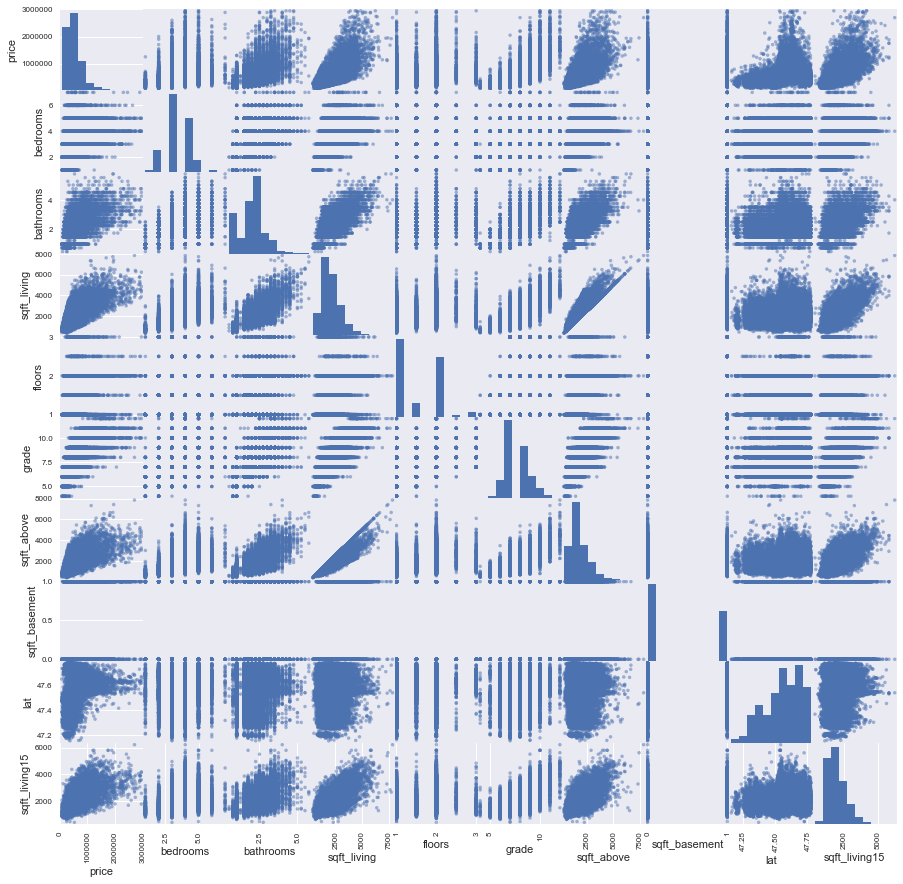

In [98]:
pd.plotting.scatter_matrix(df_subset, figsize=(15,15));

So much nicer! And it appears that half of our remaining variables are categorical in nature, given the vertical/horizontal striations. 
Let's check to see if any of our variables have normally distributed residuals (and thus are likely to have a linear relationship).

## Checking for normality

One of the easiest ways to check a variable for normality of distribution is to do a *Q-Q Plot*. 

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


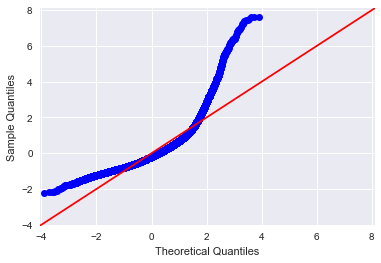

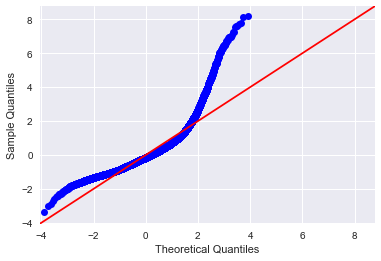

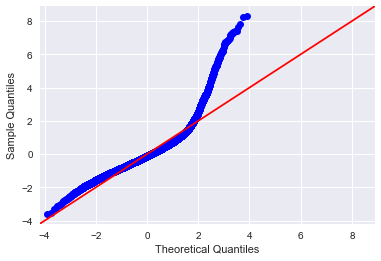

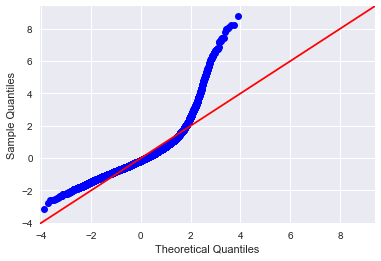

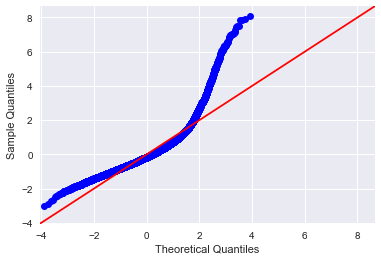

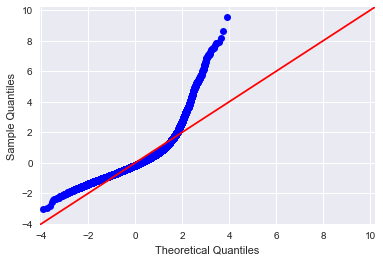

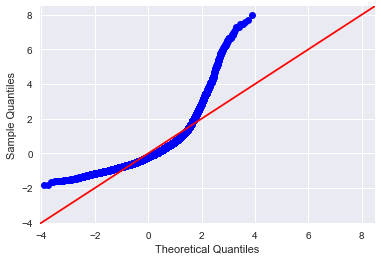

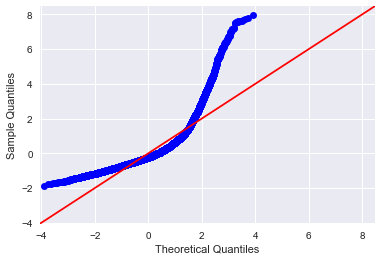

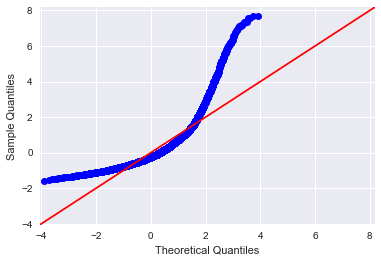

In [138]:
#define the formulas
f = 'price~bedrooms'
f2 = 'price~bathrooms'
f3 = 'price~sqft_living'
f4 = 'price~grade'
f5 = 'price~sqft_above'
f6 = 'price~sqft_living15'
f7 = 'price~floors'
f8 = 'price~lat'
f9 = 'price~basement'

#create the models
model = smf.ols(formula=f, data=df_subset).fit()
model2 = smf.ols(formula=f2, data=df_subset).fit()
model3 = smf.ols(formula=f3, data=df_subset).fit()
model4 = smf.ols(formula=f4, data=df_subset).fit()
model5 = smf.ols(formula=f5, data=df_subset).fit()
model6 = smf.ols(formula=f6, data=df_subset).fit()
model7 = smf.ols(formula=f7, data=df_subset).fit()
model8 = smf.ols(formula=f8, data=df_subset).fit()
model9 = smf.ols(formula=f9, data=df_subset).fit()

#get the residuals of the models
resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid
resid4 = model4.resid
resid5 = model5.resid
resid6 = model6.resid
resid7 = model7.resid
resid8 = model8.resid
resid9 = model9.resid

#plot the Q-Q Plots of the residuals
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid7, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid8, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid9, dist=stats.norm, line='45', fit=True)
fig.show()

It would appear that none of our variables are normally distributed. These *Q-Q Plots* suggest that the residuals of each variable are heavily right-skewed. This means that we do *not* have any linear relationships.

That's something we'll need to look at, but first let's properly deal with our categorical variables.

## Categorical Data

At the very least, we have fewer variables to contend with now. But we still have some categorical variables in our model.

Let's graph our now-fewer variables relative to *price* and see if we can learn more now.

Then we will dummify our categorical data and replace these variables with their dummy data versions.

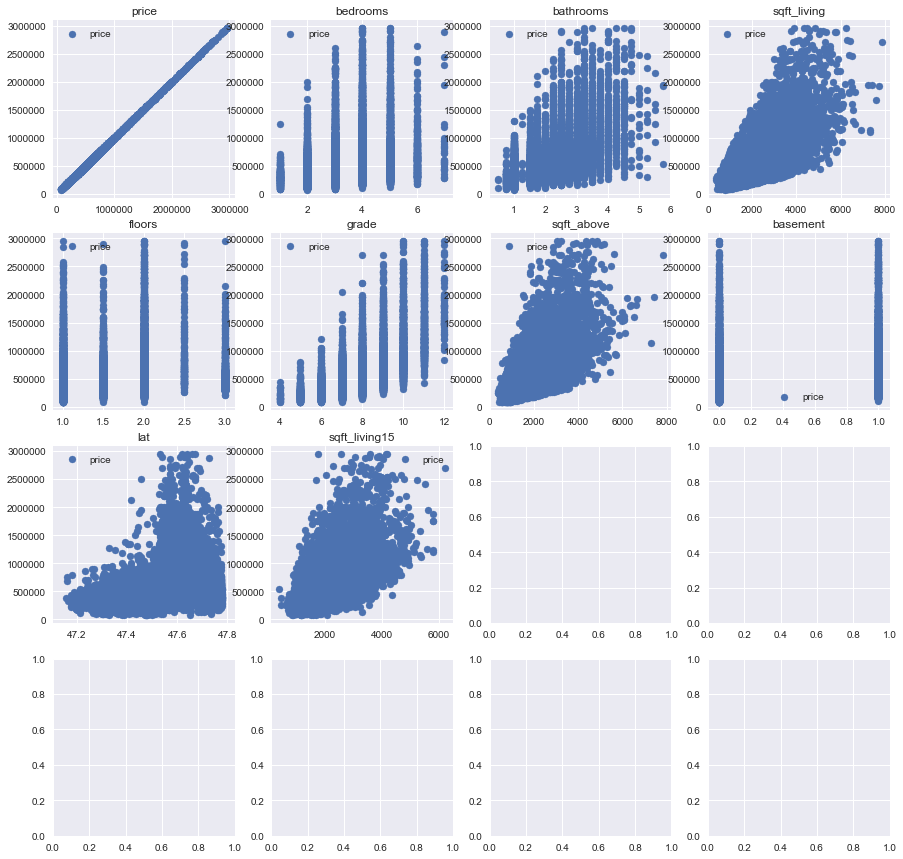

In [139]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for index, ax in enumerate(axs.flatten()):
     if index < 10:  # to avoid throwing an error
        column = df_subset.columns[index]
        ax.scatter(df_subset[column], df_subset['price'])
        ax.set_title(column)
        ax.legend()
plt.show()

Alright, let's deal with the categorical data that comes in ready-made bins.

In [140]:
# get dummies for 'grade' and 'bedrooms'
gr_dummies = pd.get_dummies(df_subset['grade'], prefix="grade")
bed_dummies = pd.get_dummies(df_subset['bedrooms'], prefix="bed")

# drop 'grade' and 'bedrooms' from the DataFrame
df_subset = df_subset.drop(['grade'], axis=1)
df_subset = df_subset.drop(['bedrooms'], axis=1)

# concatenate the dummy data with the Dataframe
df_subset = pd.concat([df_subset, gr_dummies], axis=1)
df_subset = pd.concat([df_subset, bed_dummies], axis=1)
df_subset.head()

,price,bathrooms,sqft_living,floors,sqft_above,basement,lat,sqft_living15,grade_4,grade_5,...,grade_10,grade_11,grade_12,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7
index,,,,,,,,,,,,,,,,,,,,,
0,221900.0,1.00,1180,1.0,1180,0.0,47.5112,1340,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,2.25,2570,2.0,2170,1.0,47.7210,1690,0,0,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,1.00,770,1.0,770,0.0,47.7379,2720,0,0,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,3.00,1960,1.0,1050,1.0,47.5208,1360,0,0,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,2.00,1680,1.0,1680,0.0,47.6168,1800,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Binning Floors & Bathrooms

Both *bathrooms* and *floors* have some weird values. Take a look at the histograms for each to see what we're working with.

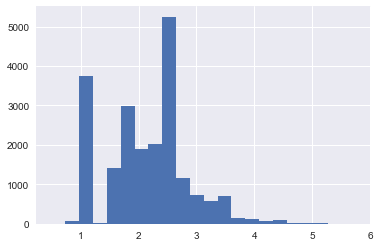

In [141]:
df_subset.bathrooms.hist(bins=len(df_subset.bathrooms.unique()));

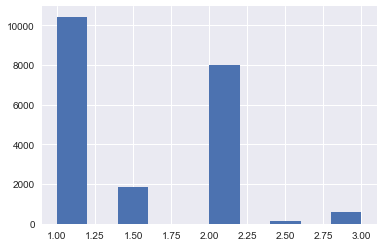

In [142]:
df_subset.floors.hist();

Now let's create some bins for *bathrooms*. Since there are a lot of half and quarter (just sinks? just toilets? just showers?) bathrooms, we'll just round every value down to an integer (1.75 intentionally rounds down to 1). It's just a hunch, but it seems like the number of full bathrooms might be more important than the number of partial bathrooms.

We'll also create bins for *floors*, but this time we'll round everything up (1.5 rounds up to 2). Again, just a hunch, but this is based on the assumption that potential buyers would assign similar weights to both full- and half-flights of stairs.

In [143]:
# Let's create bins equal to the number of integers we expect to have
bath_bins = [0, 1.99, 2.99, 3.99, 4.99, 6]
floor_bins = [0, 1.4, 2.4, 3]

# use pd.cut to create the columns
bins_bath = pd.cut(df_subset['bathrooms'], bath_bins)
bins_floor = pd.cut(df_subset['floors'], floor_bins)

# now order the columns
bins_bath = bins_bath.cat.as_unordered()
bins_floor = bins_floor.cat.as_unordered()

# replace the 
df_subset['bathrooms'] = bins_bath
df_subset['floors'] = bins_floor

# create dummies from these columns
bath_dummies = pd.get_dummies(df_subset['bathrooms'], prefix="bath")
floor_dummies = pd.get_dummies(df_subset['floors'], prefix="floors")

# drop 'bathrooms' from the DataFrame
df_subset = df_subset.drop(['bathrooms', 'floors'], axis=1)

# concatenate the dummy data with the Dataframe
df_subset = pd.concat([df_subset, bath_dummies], axis=1)
df_subset = pd.concat([df_subset, floor_dummies], axis=1)

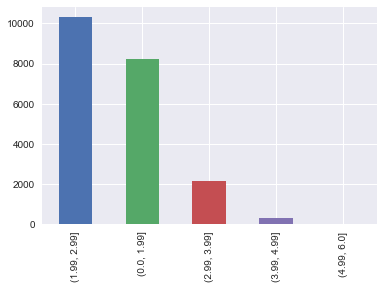

In [144]:
bins_bath.value_counts().plot(kind='bar');

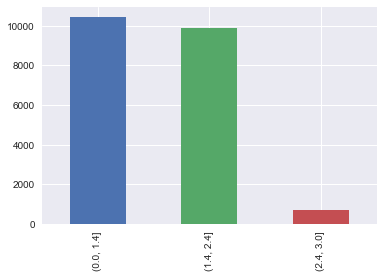

In [145]:
bins_floor.value_counts().plot(kind='bar');

Let's change the column names for our bathroom bins to something more intelligible. Also, let's get rid of any spaces or special characters other than undercores just so it doesn't throw any errors later on.

In [146]:
df_subset.columns

Index(['price', 'sqft_living', 'sqft_above', 'basement', 'lat',
       'sqft_living15', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'bed_1', 'bed_2',
       'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bath_(0.0, 1.99]',
       'bath_(1.99, 2.99]', 'bath_(2.99, 3.99]', 'bath_(3.99, 4.99]',
       'bath_(4.99, 6.0]', 'floors_(0.0, 1.4]', 'floors_(1.4, 2.4]',
       'floors_(2.4, 3.0]'],
      dtype='object')

In [147]:
# rename the offending columns
# while we're at it, rename 'sqft_basement' as well
df_subset.rename(columns={'floors_(2.4, 3.0]':'floors_3', 'bath_(0.0, 1.99]':'bath_1',
                          'bath_(1.99, 2.99]':'bath_2', 'bath_(2.99, 3.99]':'bath_3',
                          'bath_(3.99, 4.99]':'bath_4', 'bath_(4.99, 6.0]':'bath_5',
                          'floors_(0.0, 1.4]':'floors_1', 'floors_(1.4, 2.4]':'floors_2'},
                 inplace=True)

Excellent. 

### *lat* & *long*

But what about the *lat* and *long* data? Let's check out their histograms.

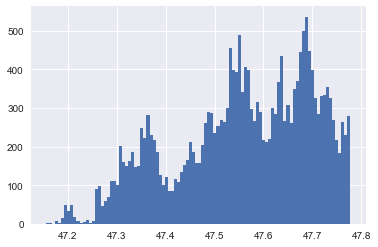

In [150]:
df_subset.lat.hist(bins=100);

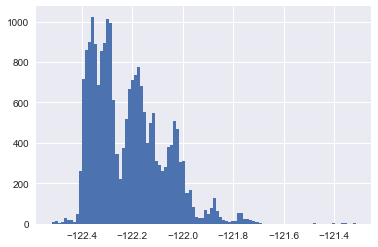

In [232]:
df.long.hist(bins=100);


# IS THIS CATEGORICAL OR CONTINUOUS OR NEITHER?!?!?!
## what about using a hexbin (see notes) ?


Though somewhat erratic, it does seem like there *might* be a normal distribution, even if skewed quite a bit.

So we should probably create some bins for it. Grouping houses by mile seems like a reasonable metric. Using a handy gps distance calculator ( https://gps-coordinates.org/distance-between-coordinates.php ), we can see that the latitudinal distance between our northernmost and southernmost houses is 42.96 miles, so *almost* 43. And so we have the number of bins we need in order to break things down by mile. However, 43 seems like a lot, so let's try cutting that in half to make the outputs more manageable; so 20 bins for each category.

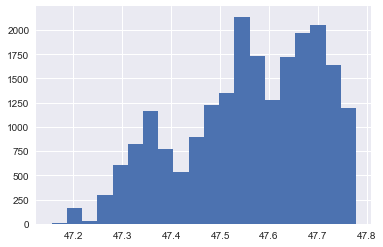

In [230]:
df.lat.hist(bins=20);

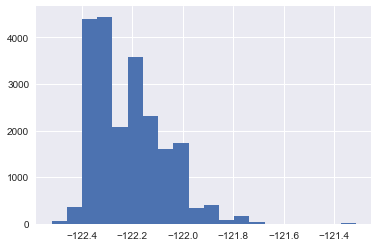

In [231]:
df.long.hist(bins=20);

Since our histogram had a weird bumpy tail on the left end, let's just get rid of those rows. Think of this as eliminating outliers now that we know they exist.

In [233]:
indexNames = df_subset[df_subset['lat'] >= 47.25 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['long'] <= -121.95 ].index
df_subset.drop(indexNames , inplace=True)


KeyError: 'lat'

In [151]:
# let's just create 21 bins for 'lat'
lat_bins = list(np.linspace(47.155, 47.778, 21))
lat_bins

[47.155,
 47.18615,
 47.2173,
 47.24845,
 47.2796,
 47.31075,
 47.3419,
 47.37305,
 47.4042,
 47.43535,
 47.466499999999996,
 47.49765,
 47.5288,
 47.55995,
 47.5911,
 47.62225,
 47.6534,
 47.68455,
 47.7157,
 47.74685,
 47.778]

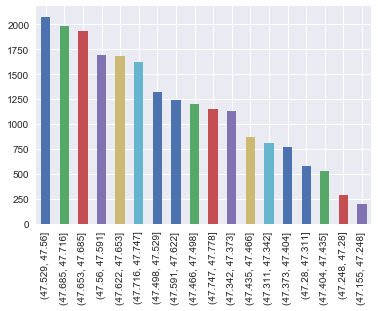

In [153]:
bins_lat = pd.cut(df_subset['lat'], lat_bins)
bins_lat = bins_lat.cat.as_unordered()
df_subset['lat'] = bins_lat
lat_dummies = pd.get_dummies(df_subset['lat'], prefix="lat")
df_subset = df_subset.drop(['lat'], axis=1)
df_subset = pd.concat([df_subset, lat_dummies], axis=1)

bins_lat.value_counts().plot(kind='bar');

In [154]:
df_subset.columns

Index(['price', 'sqft_living', 'sqft_above', 'basement', 'sqft_living15',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'bed_1', 'bed_2', 'bed_3', 'bed_4',
       'bed_5', 'bed_6', 'bed_7', 'bath_1', 'bath_2', 'bath_3', 'bath_4',
       'bath_5', 'floors_1', 'floors_2', 'floors_3', 'lat_(47.155, 47.248]',
       'lat_(47.248, 47.28]', 'lat_(47.28, 47.311]', 'lat_(47.311, 47.342]',
       'lat_(47.342, 47.373]', 'lat_(47.373, 47.404]', 'lat_(47.404, 47.435]',
       'lat_(47.435, 47.466]', 'lat_(47.466, 47.498]', 'lat_(47.498, 47.529]',
       'lat_(47.529, 47.56]', 'lat_(47.56, 47.591]', 'lat_(47.591, 47.622]',
       'lat_(47.622, 47.653]', 'lat_(47.653, 47.685]', 'lat_(47.685, 47.716]',
       'lat_(47.716, 47.747]', 'lat_(47.747, 47.778]'],
      dtype='object')

In [155]:
# and rename columns again
df_subset.rename(columns={'lat_(47.155, 47.248]':'lat_n03', 'lat_(47.248, 47.28]':'lat_n04',
                          'lat_(47.28, 47.311]':'lat_n05', 'lat_(47.311, 47.342]':'lat_n06',
                          'lat_(47.342, 47.373]':'lat_n07','lat_(47.373, 47.404]':'lat_n08',
                          'lat_(47.404, 47.435]':'lat_n09', 'lat_(47.435, 47.466]':'lat_n10',
                          'lat_(47.466, 47.498]':'lat_n11', 'lat_(47.498, 47.529]':'lat_n12',
                          'lat_(47.529, 47.56]':'lat_n13','lat_(47.56, 47.591]':'lat_n14',
                          'lat_(47.591, 47.622]':'lat_n15', 'lat_(47.622, 47.653]':'lat_n16',
                          'lat_(47.653, 47.685]':'lat_n17', 'lat_(47.685, 47.716]':'lat_n18',
                          'lat_(47.716, 47.747]':'lat_n19','lat_(47.747, 47.778]':'lat_n20'},
                 inplace=True)

## Normalizing, standardizing, scaling, etc.

We still need to tweak *sqft_living*, *sqft_above*, and *sqft_living15* to make them a bit more manageable. Let's look at how correlated these variables might be, and then try a variety of standardization methods.

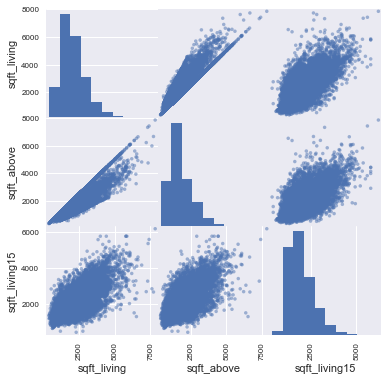

In [157]:
df_sub_cont = df_subset[['sqft_living','sqft_above','sqft_living15']]
pd.plotting.scatter_matrix(df_sub_cont,figsize  = [6, 6]);

It would appear that all three of our continuous data variables display multicollinearity (i.e. are related to one another). Additionally, their histograms all appear to be skewed to the left, so perhaps doing a log transformation will make them look more normally distributed.

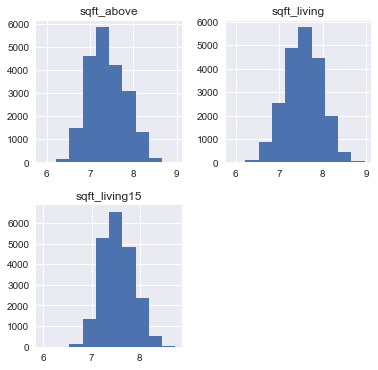

In [158]:
# creating a new DataFrame for log-transformations
df_sub_log = pd.DataFrame([])
df_sub_log['sqft_living'] = np.log(df_sub_cont['sqft_living'])
df_sub_log['sqft_above'] = np.log(df_sub_cont['sqft_above'])
df_sub_log['sqft_living15'] = np.log(df_sub_cont['sqft_living15'])
df_sub_log.hist(figsize  = [6, 6]);

Good. Now let's standardize these variables. Given the normal distribution, perhaps *mean normalization* would be worthwhile.

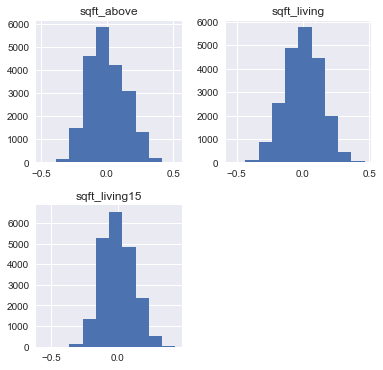

In [159]:
df_sub_log_scaled = pd.DataFrame([])
for column in df_sub_log.columns:
    G = df_sub_log[column]
    df_sub_log_scaled[column] = (G-np.mean(G)) / (max(G)-min(G))

df_sub_log_scaled.hist(figsize  = [6, 6]);

Now plug this data back into our *df_subset* DataFrame.

In [160]:
for column in df_sub_log_scaled.columns:
    df_subset[column] = df_sub_log_scaled[column]

df_subset.head()

,price,sqft_living,sqft_above,basement,sqft_living15,grade_4,grade_5,grade_6,grade_7,grade_8,...,lat_n11,lat_n12,lat_n13,lat_n14,lat_n15,lat_n16,lat_n17,lat_n18,lat_n19,lat_n20
index,,,,,,,,,,,,,,,,,,,,,
0,221900.0,-0.155092,-0.104323,0.0,-0.122955,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,538000.0,0.099720,0.095108,1.0,-0.038415,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,180000.0,-0.294834,-0.244065,0.0,0.134959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,0.011019,-0.142533,1.0,-0.117558,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,-0.039443,0.011326,0.0,-0.015442,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Now let's build a linear regression model again and see what we have.

In [161]:
y = df_subset['price']
x = df_subset.drop('price', axis=1)
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1196.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        14:56:09   Log-Likelihood:            -2.8592e+05
No. Observations:               21085   AIC:                         5.719e+05
Df Residuals:                   21042   BIC:                         5.723e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.293e+05   6600.148     80.192      0.000    5.16e+05    5.42e+05
sqft_living     8.17e+05   2.46e+04     33.196      0.000    7.69e+05    8.65e+05
sqft_above     3.048e+04   2.34e+04      1.301      0.193   -1.54e+04    7.64e+04
sqft_living15  2.378e+05    1.8e+04     13.187      0.000    2.02e+05    2.73e+05
grade_4       -1.447e+05   3.34e+04     -4.338      0.000    -2.1e+05   -7.93e+04
grade_5       -1.479e+05   1.27e+04    -11.648      0.000   -1.73e+05   -1.23e+05
grade_6       -1.748e+05   7025.300    -24.875      0.000   -1.89e+05   -1.61e+05
grade_7       -1.876e+05   5681.750    -33.023      0.000   -1.99e+05   -1.76e+05
grade_8       -1.534e+05   5599.255    -27.404      0.000   -1.64e+05   -1.42e+05
grade_9       -4.444e+04   6321.105     -7.030      0.000   -5.68e+04    -3.2e+04
grade_10       1.181e+05   7680.162     15.382      0.000    1.03e+05    1.33e+05
grade_11       3.997e+05   1.08e+04     36.871      0.000    3.78e+05    4.21e+05
grade_12       8.643e+05   2.05e+04     42.098      0.000    8.24e+05    9.05e+05
bed_1          1.285e+05   1.35e+04      9.481      0.000    1.02e+05    1.55e+05
bed_2          1.035e+05   6401.551     16.164      0.000    9.09e+04    1.16e+05
bed_3          7.513e+04   5480.544     13.708      0.000    6.44e+04    8.59e+04
bed_4          5.814e+04   5608.946     10.365      0.000    4.71e+04    6.91e+04
bed_5          6.782e+04   6693.255     10.133      0.000    5.47e+04    8.09e+04
bed_6          3.512e+04   1.15e+04      3.066      0.002    1.27e+04    5.76e+04
bed_7          6.113e+04   2.84e+04      2.149      0.032    5370.273    1.17e+05
bath_1        -1169.9827   7163.937     -0.163      0.870   -1.52e+04    1.29e+04
bath_2        -2.711e+04   6685.258     -4.055      0.000   -4.02e+04    -1.4e+04
bath_3         5.083e+04   6944.295      7.320      0.000    3.72e+04    6.44e+04
bath_4         2.265e+05   1.05e+04     21.491      0.000    2.06e+05    2.47e+05
bath_5         2.802e+05   2.61e+04     10.731      0.000    2.29e+05    3.31e+05
floors_1       1.942e-10   2.08e-11      9.347      0.000    1.53e-10    2.35e-10
floors_2       -3.13e+04   3582.541     -8.737      0.000   -3.83e+04   -2.43e+04
floors_3      -2.245e+04   7941.864     -2.827      0.005    -3.8e+04   -6886.343
lat_n01       -2.869e+04   4.96e+04     -0.578      0.563   -1.26e+05    6.86e+04
lat_n02       -7.595e+04   1.45e+04     -5.247      0.000   -1.04e+05   -4.76e+04
lat_n03       -5489.7613   3.66e+04     -0.150      0.881   -7.73e+04    6.63e+04
lat_n04       -1.133e+05    1.1e+04    -10.281      0.000   -1.35e+05   -9.17e+04
lat_n05       -1.305e+05   8222.280    -15.874      0.000   -1.47e+05   -1.14e+05
lat_n06       -1.125e+05   7169.152    -15.698      0.000   -1.27e+05   -9.85e+04
lat_n07       -8.395e+04   6390.120    -13.137   

That's a pretty long list of variables, but it does seem that our R-squared has improved, although skew and kurtosis have gotten worse.

# Now to start addressing multicollinearity!

So let's examine our continuous data first for potential collinearity. We can do this easily using a heatmap to display the pairwise correlation scores between the variables.

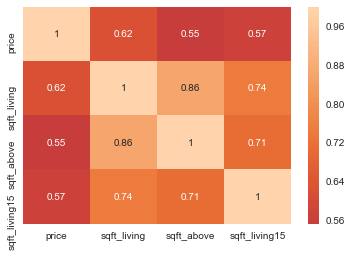

In [217]:
# slice just the variables we want to compare
df_sub_continuous = df_subset[['price','sqft_living','sqft_above','sqft_living15']]

# make a heatmap of the correlation
sns.heatmap(df_sub_continuous.corr(), center=0, annot=True);

It looks like they are all pretty heavily correlated. 

### Building a feature builder

Let's build a function that can take in two variables, a target ('price'), and a dataset to create a feature for our dataset, outputting a column of coefficients to our dataset for the new feature.

In [218]:
# building a feature building function. what fun!
def feature_builder(var_1, var_2, target, dataset):
    """
    Parameters :
    ------------
    var_1 : column name of first potentially correlated variable
    var_2 : column name of second potentially correlated variable
    target : column name of target variable
    dataset : name of pandas DataFrame
    
    
    """    
    weights = np.linspace(0, 1, 10000)
    max_corr = -1
    best_weights = None
    corrs = []
    
    for index, weight in enumerate(weights):
        w1 = weight # get the first weight value
        w2 = 1 - weight # get the second weight value
        vals = w1*dataset[var_1] + w2*dataset[var_2] # create a linear combination of the columns
        corr_coeff = np.abs(np.corrcoef(vals, dataset[target]))[0][1] # get the corrcoeff with the target
        
        # if the corr_coeff is larger than the max, store the weights and change the max
        if corr_coeff > max_corr:
            best_weights = [w1, w2]
            max_corr = corr_coeff
            
        # store the correlation coefficients to a list
        corrs.append(corr_coeff)  
        
    # output the desired weights
    print('weight for [',var_1,'] : weight for [',var_2,']\n', best_weights)
    feat_label = str(var_1+'_'+var_2+'_feature')
    print('feature name : ', feat_label)
    dataset[feat_label] = w1*dataset[var_1] + w2*dataset[var_2]
    pass

In [219]:
# now to run the function on our small dataset
feature_builder('sqft_living','sqft_above','price',df_sub_continuous)

weight for [ sqft_living ] : weight for [ sqft_above ]
 [0.9192919291929194, 0.08070807080708065]
feature name :  sqft_living_sqft_above_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Adding complexity

Since all three of our continuous data variables are pretty correlated, let's got through another iteration of feature building that weighs our first feature against the other remaining continuous data variable *sqft_living15*.

In [220]:
# same as before, but using the name of the new feature as var_1
feature_builder('sqft_living_sqft_above_feature','sqft_living15','price',df_sub_continuous)

weight for [ sqft_living_sqft_above_feature ] : weight for [ sqft_living15 ]
 [0.6333633363336334, 0.3666366636663666]
feature name :  sqft_living_sqft_above_feature_sqft_living15_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [221]:
# let's take a look at our new and improved small dataset
df_sub_continuous.head()

,price,sqft_living,sqft_above,sqft_living15,sqft_living_sqft_above_feature,sqft_living_sqft_above_feature_sqft_living15_feature
index,,,,,,
0,221900.0,-0.155092,-0.104323,-0.122955,-0.155092,-0.155092
1,538000.0,0.099720,0.095108,-0.038415,0.099720,0.099720
2,180000.0,-0.294834,-0.244065,0.134959,-0.294834,-0.294834
3,604000.0,0.011019,-0.142533,-0.117558,0.011019,0.011019
4,510000.0,-0.039443,0.011326,-0.015442,-0.039443,-0.039443


#### Evaluating our new features

Now that we've created two potentially useful features, let's see how they might effect our model. To do so, we'll run three OLS models and compare their scores.

In [222]:
y = df_sub_continuous['price']

# original variables, untouched
x1 = df_sub_continuous[['sqft_living','sqft_above','sqft_living15']]

# our first feature with the remaining original variable
x2 = df_sub_continuous[['sqft_living15','sqft_living_sqft_above_feature']]

# our second feature that combined them all in weighted fashion
x3 = df_sub_continuous[['sqft_living_sqft_above_feature_sqft_living15_feature']]

X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)
X3 = sm.add_constant(x3)

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, X1).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     4920.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        17:51:49   Log-Likelihood:            -2.9145e+05
No. Observations:               21050   AIC:                         5.829e+05
Df Residuals:                   21046   BIC:                         5.829e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.315e+05   1718.701    309.239      0.000    5.28e+05    5.35e+05
sqft_living    1.094e+06   2.66e+04     41.053      0.000    1.04e+06    1.15e+06
sqft_above    -2.203e+04    2.5e+04     -0.881      0.378   -7.11e+04     2.7e+04
sqft_living15  6.274e+05   2.22e+04     28.322      0.000    5.84e+05    6.71e+05
==============================================================================
Omnibus:                    10100.081   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91756.377
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      12.320   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
# modeling and summarizing the second option (midway point)
linreg = sm.OLS(y, X2).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     7379.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        17:51:50   Log-Likelihood:            -2.9145e+05
No. Observations:               21050   AIC:                         5.829e+05
Df Residuals:                   21047   BIC:                         5.829e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           5.315e+05   1718.692    309.241      0.000    5.28e+05    5.35e+05
sqft_living15                   6.235e+05   2.17e+04     28.733      0.000    5.81e+05    6.66e+05
sqft_living_sqft_above_feature  1.077e+06   1.88e+04     57.390      0.000    1.04e+06    1.11e+06
==============================================================================
Omnibus:                    10093.774   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91591.286
Skew:                           2.105   Prob(JB):                         0.00
Kurtosis:                      12.311   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
# modeling and summarizing the third option (fully combined)
linreg = sm.OLS(y, X3).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        17:51:51   Log-Likelihood:            -2.9185e+05
No. Observations:               21050   AIC:                         5.837e+05
Df Residuals:                   21048   BIC:                         5.837e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.315e+05   1752.034    303.356      0.000    5.28e+05    5.35e+05
sqft_living_sqft_above_feature_sqft_living15_feature  1.478e+06   1.28e+04    115.792      0.000    1.45e+06     1.5e+06
==============================================================================
Omnibus:                    10048.701   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88484.054
Skew:                           2.105   Prob(JB):                         0.00
Kurtosis:                      12.119   Cond. No.                         7.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Looking at these summaries in sequence, it seems that the **F-statistic**, **Skew**, **Kurtosis**, and **Cond. No.** have all consistently improved as we progressed through this process. Our **R-squared** score has fallen a little bit, but that's to be expected when getting rid of multicollinearity. 

### Plugging this back into the larger dataset

In [225]:
df_subset['sqft_living_sqft_above_feature_sqft_living15_feature'] = df_sub_continuous['sqft_living_sqft_above_feature_sqft_living15_feature']

# since we're about to remove columns, let's create a new DataFrame
df_sub_feats = df_subset.drop(['sqft_living','sqft_above','sqft_living15'], axis=1)
df_sub_feats.head()

In [228]:
y = df_sub_feats['price']

# original variables, untouched
x = df_sub_feats.drop('price', axis=1)

X = sm.add_constant(x)

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1328.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        18:03:03   Log-Likelihood:            -2.8396e+05
No. Observations:               21050   AIC:                         5.680e+05
Df Residuals:                   21010   BIC:                         5.683e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.905e+05   4926.641     79.269      0.000    3.81e+05       4e+05
basement                                              5791.6998   2939.746      1.970      0.049      29.572    1.16e+04
grade_4                                              -1.417e+05    3.1e+04     -4.567      0.000   -2.03e+05   -8.09e+04
grade_5                                              -1.557e+05   1.18e+04    -13.181      0.000   -1.79e+05   -1.33e+05
grade_6                                              -1.867e+05   6485.068    -28.796      0.000   -1.99e+05   -1.74e+05
grade_7                                              -1.924e+05   5303.650    -36.286      0.000   -2.03e+05   -1.82e+05
grade_8                                              -1.458e+05   5299.905    -27.502      0.000   -1.56e+05   -1.35e+05
grade_9                                              -2.088e+04   5941.854     -3.515      0.000   -3.25e+04   -9236.901
grade_10                                              1.427e+05   7160.712     19.923      0.000    1.29e+05    1.57e+05
grade_11                                              3.847e+05   1.02e+04     37.889      0.000    3.65e+05    4.05e+05
grade_12                                              7.065e+05   2.03e+04     34.813      0.000    6.67e+05    7.46e+05
bed_1                                                 1.157e+05   1.26e+04      9.171      0.000     9.1e+04     1.4e+05
bed_2                                                 8.345e+04   6047.535     13.799      0.000    7.16e+04    9.53e+04
bed_3                                                 5.668e+04   5196.577     10.908      0.000    4.65e+04    6.69e+04
bed_4                                                 4.521e+04   5313.542      8.508      0.000    3.48e+04    5.56e+04
bed_5                                                 5.102e+04   6320.376      8.072      0.000    3.86e+04    6.34e+04
bed_6                                                 1.763e+04   1.07e+04      1.645      0.100   -3383.091    3.86e+04
bed_7                                                 2.086e+04   2.68e+04      0.778      0.437   -3.17e+04    7.34e+04
bath_1                                                5458.3354   7034.746      0.776      0.438   -8330.307    1.92e+04
bath_2                                               -1.845e+04   6550.560     -2.817      0.005   -3.13e+04   -5611.541
bath_3                                                4.889e+04   6783.939      7.206      0.000    3.56e+04    6.22e+04
bath_4                                                2.085e+05   1.01e+04     20.681      0.000    1.89e+05    2.28e+05
bath_5                                                1.46

## I should probably look at *"Assumptions for Linear Regressions"* in my notes and work my way down, performing each test on that page of notes and all of the following ones for the rest of Section 7 and all of Section 8

All the same, we still have too many variables, so let's try to cut down on multicollinearity if we can. 

*sqft_living* is also highly correlated to both *bedrooms* and *bathrooms*. Since the number of bedrooms and bathrooms in a house is a direct result of how much living space there is (and because *sqft_living* is the most correlated to *price*), we can go ahead and drop the room-related variables.

## I need to figure out which multicollinear relationships exist, and which ones would be best served by creating a new feature that combines them (bedrooms:bathrooms?, sqft_living:sqft_lot?, etc., etc. )